In [1]:
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [3]:
def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [4]:
X_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz'))["y"]
y_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz'))["dist"]

In [ ]:
X_val = np.load(os.path.join(data_folder,'Xy_val_dist.npz'))["y"]
y_val = np.load(os.path.join(data_folder, 'Xy_val_dist.npz'))["dist"]
X_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["y"]
y_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["dist"]

In [5]:
X_train_cut = cut_X(X_train)

In [7]:
_, width, height, depth,  = X_train.shape

In [6]:
X_train_RF = reshape_RF(X_train_cut)

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_train_RF)

In [8]:
y_kmeans = kmeans.predict(X_train_RF)

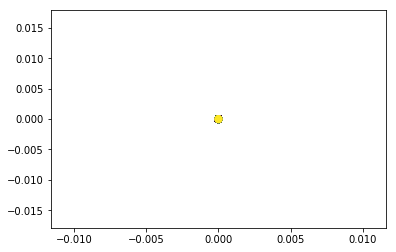

In [12]:
plt.scatter(X_train_RF[:,0], X_train_RF[:,1],
           c=y_kmeans, s=50, cmap='viridis')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:,0], centers[:,1], c='black',
#           s=200, alpha=0.5)

In [16]:
y_kmeans

array([2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 3, 2, 0, 2, 3, 3, 3,
       0, 2, 1, 0, 1, 0, 2, 3, 1, 3, 2, 0, 2, 2, 0, 3, 1, 3, 2, 1, 2, 0,
       2, 3, 3, 0, 1, 0, 3, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 3, 1, 2, 3, 3,
       1, 0, 1, 0, 3, 2, 0, 3, 3, 2, 1, 2, 0, 1, 1, 2, 0, 3, 0, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 3, 0, 3, 0, 0, 2, 3,
       2, 0, 2, 0, 0, 3, 0, 1, 3, 1, 0, 3, 2, 0, 0, 2, 1, 3, 3, 2, 1, 1,
       2, 3, 1, 0, 0, 1, 1, 0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 1, 2, 2, 0, 1,
       0, 3, 0, 2, 3, 1, 1, 1, 2, 3, 3, 1, 3, 0, 0, 2, 1, 3, 2, 1, 0, 3,
       1, 1, 2, 0, 1, 1, 1, 0, 3, 0, 2, 0, 3, 0, 1, 0, 1, 3, 0, 1, 1, 1,
       0, 3, 0, 1, 0, 0, 0, 2, 3, 1, 0, 2, 2, 2, 0, 2, 1, 3, 2, 2, 1, 0,
       2, 3, 2, 3, 2, 0, 1, 0, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 0,
       0, 3, 1, 0, 2, 0, 3, 2, 2, 2, 1, 3, 3, 0, 1, 0, 0, 1, 2, 3, 3, 2,
       3, 1, 1, 2, 2, 1, 3, 3, 2, 2, 1, 3, 3, 1, 1, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 0, 2, 0, 1, 2, 2, 1, 3, 1, 3, 3, 3, 2,

In [22]:
y_train[y_train==10]=3

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_train, y_kmeans)

array([[200,   0,   0,   0],
       [  0, 192,   0,   0],
       [  0,   0, 190,   0],
       [  0,   0,   0, 186]])

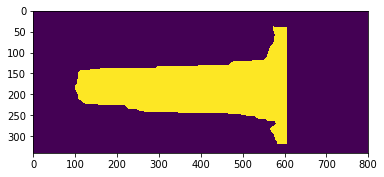

In [42]:
%matplotlib inline
from sklearn import cluster
from matplotlib.image import imread
plt.imshow(X_train_cut[3][...,0])

In [43]:
image = X_train_cut[3][...,0]

In [46]:
image_res = image.reshape(340*800)

In [52]:
img = X_train_RF[3][...,np.newaxis]

In [53]:
img.shape

(272000, 1)

In [60]:
kmeans_cluster = KMeans(n_clusters=10)
kmeans_cluster.fit(img)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


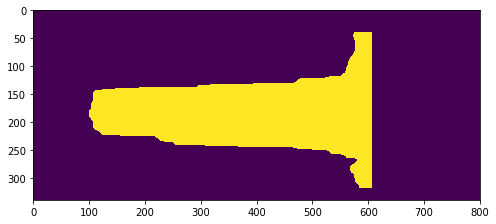

In [61]:
plt.figure(figsize = (8,6))
plt.imshow(cluster_centers[cluster_labels].reshape(340, 800))